In [62]:
import wikipedia
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [100]:
wikiFace = wikipedia.WikipediaPage('Congnition')

In [101]:
text = wikiFace.content

# Summary

In [102]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk

text = wikiFace.content

stemmer = SnowballStemmer("english")
stopWords = set(stopwords.words("english"))
words = word_tokenize(text)

freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue

    word = stemmer.stem(word)

    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1

sentences = sent_tokenize(text)
sentenceValue = dict()

for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq



sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]

# Average value of a sentence from original text
average = int(sumValues / len(sentenceValue))


summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
        summary += " " + sentence

print(summary)

 Cognition is "the mental action or process of acquiring knowledge and understanding through thought, experience, and the senses". == Etymology ==
The word cognition comes from the Latin verb cognosco (con, 'with', and gnōscō, 'know'; itself a cognate of the Greek verb γι(γ)νώσκω, gi(g)nόsko, meaning 'I know, perceive'), meaning 'to conceptualize' or 'to recognize'. == The beginnings of the studies on cognition ==
The word cognition dates back to the 15th century, when it meant "thinking and awareness". Attention to cognitive processes came about more than eighteen centuries earlier, however, beginning with Aristotle (384–322 BC) and his interest in the inner workings of the mind and how they affect the human experience. Two millennia later, as psychology emerged as a burgeoning field of study in Europe and then gained a following in America, other scientists like Wilhelm Wundt, Herman Ebbinghaus, Mary Whiton Calkins, and William James would offer their contributions to the study of hu

In [103]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import networkx as nx
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [104]:
# Importing the text the lazy way.
gatsby="In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since. \"Whenever you feel like criticizing any one,\" he told me, \"just remember that all the people in this world haven't had the advantages that you've had.\" He didn't say any more but we've always been unusually communicative in a reserved way, and I understood that he meant a great deal more than that. In consequence I'm inclined to reserve all judgments, a habit that has opened up many curious natures to me and also made me the victim of not a few veteran bores. The abnormal mind is quick to detect and attach itself to this quality when it appears in a normal person, and so it came about that in college I was unjustly accused of being a politician, because I was privy to the secret griefs of wild, unknown men. Most of the confidences were unsought--frequently I have feigned sleep, preoccupation, or a hostile levity when I realized by some unmistakable sign that an intimate revelation was quivering on the horizon--for the intimate revelations of young men or at least the terms in which they express them are usually plagiaristic and marred by obvious suppressions. Reserving judgments is a matter of infinite hope. I am still a little afraid of missing something if I forget that, as my father snobbishly suggested, and I snobbishly repeat a sense of the fundamental decencies is parcelled out unequally at birth. And, after boasting this way of my tolerance, I come to the admission that it has a limit. Conduct may be founded on the hard rock or the wet marshes but after a certain point I don't care what it's founded on. When I came back from the East last autumn I felt that I wanted the world to be in uniform and at a sort of moral attention forever; I wanted no more riotous excursions with privileged glimpses into the human heart. Only Gatsby, the man who gives his name to this book, was exempt from my reaction--Gatsby who represented everything for which I have an unaffected scorn. If personality is an unbroken series of successful gestures, then there was something gorgeous about him, some heightened sensitivity to the promises of life, as if he were related to one of those intricate machines that register earthquakes ten thousand miles away. This responsiveness had nothing to do with that flabby impressionability which is dignified under the name of the \"creative temperament\"--it was an extraordinary gift for hope, a romantic readiness such as I have never found in any other person and which it is not likely I shall ever find again. No--Gatsby turned out all right at the end; it is what preyed on Gatsby, what foul dust floated in the wake of his dreams that temporarily closed out my interest in the abortive sorrows and short-winded elations of men."

# We want to use the standard english-language parser.
parser = spacy.load('en')

# Parsing Gatsby.
gatsby = parser(text)

# Dividing the text into sentences and storing them as a list of strings.
sentences=[]
for span in gatsby.sents:
    # go from the start to the end of each span, returning each token in the sentence
    # combine each token using join()
    sent = ''.join(gatsby[i].string for i in range(span.start, span.end)).strip()
    sentences.append(sent)

# Creating the tf-idf matrix.
counter = TfidfVectorizer(lowercase=False, 
                          stop_words=None,
                          ngram_range=(1, 1), 
                          analyzer=u'word', 
                          max_df=.5, 
                          min_df=1,
                          max_features=None, 
                          vocabulary=None, 
                          binary=False)

#Applying the vectorizer
data_counts=counter.fit_transform(sentences)

In [105]:
# Calculating similarity
similarity = data_counts * data_counts.T

# Identifying the sentence with the highest rank.
nx_graph = nx.from_scipy_sparse_matrix(similarity)
ranks=nx.pagerank(nx_graph, alpha=.85, tol=.00000001)

ranked = sorted(((ranks[i],s) for i,s in enumerate(sentences)),
                reverse=True)
print(ranked[:3])


[(0.012856438739566694, 'The theory is that in feature searches, it is easy to spot the target, or if it is absent, because of the difference in color between the target and the distractors.'), (0.012558682305585501, 'The serial position experiment is meant to test a theory of memory that states that when information is given in a serial manner, we tend to remember information in the beginning of the sequence, called the primacy effect, and information in the end of the sequence, called the recency effect.'), (0.012547081947981806, 'In the Brown-Peterson experiment, participants are briefly presented with a trigram and in one particular version of the experiment, they are then given a distractor task, asking them to identify whether a sequence of words are in fact words, or non-words (due to being misspelled, etc.).')]


In [106]:
# Removing stop words and punctuation, then getting a list of all unique words in the text
gatsby_filt = [word for word in gatsby if word.is_stop==False and (word.pos_=='NOUN' or word.pos_=='ADJ')]
words=set(gatsby_filt)

#Creating a grid indicating whether words are within 4 places of the target word
adjacency=pd.DataFrame(columns=words,index=words,data=0)

#Iterating through each word in the text and indicating which of the unique words are its neighbors
for i,word in enumerate(gatsby):
    # Checking if any of the word's next four neighbors are in the word list 
    if any([word == item for item in gatsby_filt]):
        # Making sure to stop at the end of the string, even if there are less than four words left after the target.
        end=max(0,len(gatsby)-(len(gatsby)-(i+5)))
        # The potential neighbors.
        nextwords=gatsby[i+1:end]
        # Filtering the neighbors to select only those in the word list
        inset=[x in gatsby_filt for x in nextwords]
        neighbors=[nextwords[i] for i in range(len(nextwords)) if inset[i]]
        # Adding 1 to the adjacency matrix for neighbors of the target word
        if neighbors:
            adjacency.loc[word,neighbors]=adjacency.loc[word,neighbors]+1

print('done!')
        



done!


In [107]:
# Running TextRank
nx_words = nx.from_numpy_matrix(adjacency.as_matrix())
ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)

# Identifying the five most highly ranked keywords
ranked = sorted(((ranks[i],s) for i,s in enumerate(words)),
                reverse=True)
print(ranked[:5])

[(0.0019875515489837787, stronger), (0.0019540896304408506, leveling), (0.0019540896304408506, history), (0.001795524441405293, particular), (0.001795524441405293, time)]


In [108]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import clear_output

In [109]:
from nltk.tokenize import sent_tokenize
sent_tokenize_list = sent_tokenize(text)
len(sent_tokenize_list)

96

In [110]:
# Processing the data.

from nltk.corpus import gutenberg
import re
from sklearn.feature_extraction.text import TfidfVectorizer



# Creating the tf-idf matrix.
vectorizer = TfidfVectorizer(stop_words='english')
emma_paras_tfidf=vectorizer.fit_transform(sent_tokenize_list)

# Getting the word list.
terms = vectorizer.get_feature_names()

# Number of topics.
ntopics=5

# Linking words to topics
def word_topic(tfidf,solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

# Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=chosenlist
    return(topwords)

# Number of words to look at for each topic.
n_top_words = 10


In [111]:
# LSA

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd= TruncatedSVD(ntopics)
lsa = make_pipeline(svd, Normalizer(copy=False))
emma_paras_lsa = lsa.fit_transform(emma_paras_tfidf)

components_lsa = word_topic(emma_paras_tfidf, emma_paras_lsa, terms)

topwords=pd.DataFrame()
topwords['LSA']=top_words(components_lsa, n_top_words)                


In [112]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_topics=ntopics, 
          doc_topic_prior=None, # Prior = 1/n_documents
          topic_word_prior=1/ntopics,
          learning_decay=0.7, # Convergence rate.
          learning_offset=10.0, # Causes earlier iterations to have less influence on the learning
          max_iter=10, # when to stop even if the model is not converging (to prevent running forever)
          evaluate_every=-1, # Do not evaluate perplexity, as it slows training time.
          mean_change_tol=0.001, # Stop updating the document topic distribution in the E-step when mean change is < tol
          max_doc_update_iter=100, # When to stop updating the document topic distribution in the E-step even if tol is not reached
          n_jobs=-1, # Use all available CPUs to speed up processing time.
          verbose=0, # amount of output to give while iterating
          random_state=0
         )

emma_paras_lda = lda.fit_transform(emma_paras_tfidf) 

components_lda = word_topic(emma_paras_tfidf, emma_paras_lda, terms)

topwords['LDA']=top_words(components_lda, n_top_words)


In [113]:
# NNMF

from sklearn.decomposition import NMF

nmf = NMF(alpha=0.0, 
          init='nndsvdar', # how starting value are calculated
          l1_ratio=0.0, # Sets whether regularization is L2 (0), L1 (1), or a combination (values between 0 and 1)
          max_iter=200, # when to stop even if the model is not converging (to prevent running forever)
          n_components=ntopics, 
          random_state=0, 
          solver='cd', # Use Coordinate Descent to solve
          tol=0.0001, # model will stop if tfidf-WH <= tol
          verbose=0 # amount of output to give while iterating
         )
emma_paras_nmf = nmf.fit_transform(emma_paras_tfidf) 

components_nmf = word_topic(emma_paras_tfidf, emma_paras_nmf, terms)

topwords['NNMF']=top_words(components_nmf, n_top_words)

In [114]:
for topic in range(ntopics):
    print('Topic {}:'.format(topic))
    print(topwords.loc[topic])
 

Topic 0:
                LSA               LDA              NNMF
0    cognitive 2.82   perception 0.88    cognitive 0.76
0    cognition 2.73    aristotle 0.67    cognition 0.56
0       memory 2.23    cognitive 0.63        human 0.33
0        human 1.71    sensation 0.52   psychology 0.32
0   psychology 1.49      imagery 0.51       memory 0.27
0  information 1.36  information 0.48    processes 0.26
0       theory 1.35       mental 0.48    knowledge 0.25
0         word 1.27       memory 0.44      studies 0.23
0        words 1.25           bc 0.42      thought 0.23
0    processes 1.23          384 0.42  development 0.23
Topic 1:
                LSA               LDA              NNMF
1       target 1.24      stimuli 0.94       target 1.19
1        green 0.97        memory 0.8     searches 0.71
1         time 0.93    cognition 0.79  conjunctive 0.56
1     searches 0.86    cognitive 0.71          time 0.5
1       circle 0.82       recall 0.65       absent 0.45
1       recall 0.74  informati

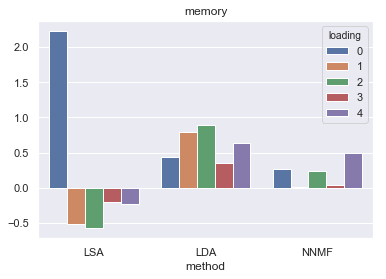

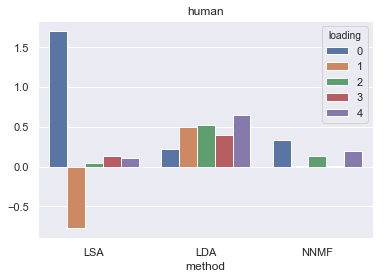

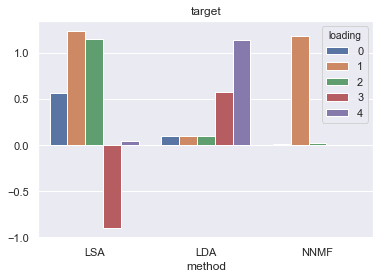

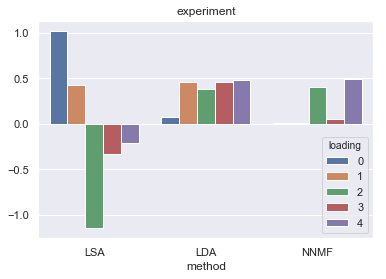

In [116]:
# The words to look at.
targetwords=['memory','human','target','experiment']

# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

# For each word, extracting and string the loadings for each method.
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

# Labeling the data by method and providing an ordering variable for graphing purposes. 
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], 5, axis=0)
wordloadings['loading']=[0,1,2,3,4]*3

sns.set(style="darkgrid")

for word in targetwords:
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()


In [118]:
import PyPDF2

In [119]:
pdfFileObj = open('BK_RAND_002806.pdf', 'rb')

In [120]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [121]:
pdfReader.numPages

11

In [122]:
pageObj = pdfReader.getPage(5)

In [123]:
pageObj.extractText()

'ˇ˛˙˚ˆˆˆˆ˛˙ˆ˚˚˝‘˙˚˘\nˆ˛˝’š˚‘˚•˘•˚˚•˙˙ž‘˝˘˘˝˙˚˙\nˆˆ˙˚˘˚˘˙˘˘˚•˙˚˘ˆ˚˘˙˙˝˚˚ˆ\n˘ˆ’¡˚•˙†˝˚‘˚˚ˆˆ˝˚•˘˘‘˙˚\n˚ˆ˘„˘˚•˙ˆ˘˘‘˙˚˚˙˙˝\n˚˘™˚˚˙†˝˚‘˘˚ˆ˛˙ˆ˚˚˘˘ˆˇ˘˚˘˚•˙˘\n˝˚‘˚‘‘ˆ˙˚˘’\nł˘ˆ˘˙ˇˇ˘˚˘ˆˆ˘ˆ”ˇ‘˙¢–€˛˙ˆ˘\n˘˚•˘˙ˆ˚˚˚ˆ‘Łˆ˚˙˛˚˛˚˙ˇˆ˙˘\n˙ˇˇ˘˚˙˙˝˚ˆ•ˆ˘˚ˆ˙˛˙ˆˆ˚’\nœˆˇ\nˆˇ\n'

In [137]:
import textract

In [138]:
pdfFileObj = textract.process('Human_Cognition.pdf',encoding='utf_8', method='tesseract')

b'THE QUARTERLY NEWSLETTER OF THE\nLA B ORA TOR Y\n0F\nCOMPA RA TIVE\'\nHUMAN COGNITION\n\nCenter for Human Information Processing\nUniversity of California, San Diego\n\nVolume 9, Number 1 January 1987\n\nCOLLECTIVE MEMORY AND REMEMBERING\n\nTABLE OF CONTENTS\n\nmvm MIDDLETON 2 Sam: 1mm and Amaranth\xe2\x80\x9d\n\nMICHAEL SCHUDSON 5 Pieterwlmn III the Put In Manta!\nLift\n\nJOHN SHOTTER Remembning um} Fnrgcitl\'ny n1 smut\nEDITORS Inmmmm\nTeruinhn Nunes Carruher\nStephen Din JAMES WERTSCH Callutwc Mcmory: 1mm Ivam a\n\nYrjo Engesbr\xef\xac\x81m Sociohiltnn\'wl Pcupertiu:\n\nWilliam Hall _\nGiyoo Hume DAVID MIDDLEToN Dunn [a 1hr Minn: Convlrtatmnd\n\n. . Remembering m Jam! Activity in\nD\xe2\x80\x9c.\xe2\x80\x98"d M\xe2\x80\x99ddl\xe2\x80\x98w\xe2\x80\x9c Leaminy an English Mom} Dunn\nLuis C. Moll\n\nJunes Wertsch\n\n\xe2\x80\x98 l d d u 1\nVladimir Zinchenko DEREK EDWARDS Edutatwnnl Know , ye an Cu 2: we\n\nMemory\n\nMANAGING EDITORS\nPeggy Bengal\nMichael Cole\n\nMARGUERIT\xe2\x80\x9

In [140]:
pdfFileObj = textract.process('Human_Cognition.pdf',encoding='ascii', method='tesseract')

<function bytes.decode>